In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import sys
import numpy as np
sys.path.append("../../")
import data_loading as dl

from microfit.run_plotter import RunHistPlotter
from microfit.histogram import Binning, MultiChannelBinning, RunHistGenerator

In [4]:
RUN = ["1"]  # this can be a list of several runs, i.e. [1,2,3]
rundata, mc_weights, data_pot = dl.load_runs(
    RUN,
    data="bnb",  # which data to load
    # truth_filtered_sets=["nue", "drt", "nc_pi0", "cc_pi0", "cc_nopi", "cc_cpi", "nc_nopi", "nc_cpi"],
    # Which truth-filtered MC sets to load in addition to the main MC set. At least nu_e and dirt
    # are highly recommended because the statistics at the final level of the selection are very low.
    truth_filtered_sets=["nue", "drt"],
    # Choose which additional variables to load. Which ones are required may depend on the selection
    # you wish to apply.
    loadpi0variables=True,
    loadshowervariables=True,
    loadrecoveryvars=True,
    loadsystematics=True,
    # Load the nu_e set one more time with the LEE weights applied
    load_lee=False,
    # With the cache enabled, by default the loaded dataframes will be stored as HDF5 files
    # in the 'cached_dataframes' folder. This will speed up subsequent loading of the same data.
    enable_cache=True,
    # Since this is Open Data, we are allowed to unblind the data. By default, the data is blinded.
    blinded=False,
)

get_rundict: run_number= 1
get_rundict: run_number= 1
get_rundict: run_number= 1
get_rundict: run_number= 1
get_rundict: run_number= 1
get_rundict: run_number= 1
get_rundict: run_number= 1
get_rundict: run_number= 1


In [5]:
# binning_def = ("reco_e", 17, (0.01, 2.39), r"Reconstructed Energy [ GeV ]")
binning_def = ("reco_e", 10, (0.15, 1.55), r"Reconstructed Energy [GeV]")  # reproduce technote

binning_npl = Binning.from_config(*binning_def)
binning_npl.set_selection(preselection="NP", selection="NPBDT")
binning_npl.label = "NPBDT"

binning_zpl = Binning.from_config(*binning_def)
binning_zpl.set_selection(preselection="ZP", selection="ZPBDT")
binning_zpl.label = "ZPBDT"

binning = MultiChannelBinning([binning_npl, binning_zpl])
binning


MultiChannelBinning(binnings=[Binning(variable='reco_e', bin_edges=array([0.15, 0.29, 0.43, 0.57, 0.71, 0.85, 0.99, 1.13, 1.27, 1.41, 1.55]), label='NPBDT', variable_tex='Reconstructed Energy [GeV]', is_log=False, selection_query='nslice == 1 and selected == 1 and shr_energy_tot_cali > 0.07 and ( (_opfilter_pe_beam > 0 and _opfilter_pe_veto < 20) or bnbdata == 1 or extdata == 1) and n_tracks_contained > 0 and nslice == 1 and selected == 1 and shr_energy_tot_cali > 0.07 and ( (_opfilter_pe_beam > 0 and _opfilter_pe_veto < 20) or bnbdata == 1 or extdata == 1) and n_tracks_contained > 0 and CosmicIPAll3D > 10. and trkpid < 0.02 and hits_ratio > 0.50 and shrmoliereavg < 9 and subcluster > 4 and trkfit < 0.65 and tksh_distance < 6.0 and (shr_tkfit_nhits_tot > 1 and shr_tkfit_dedx_max > 0.5 and shr_tkfit_dedx_max < 5.5) and tksh_angle > -0.9 and shr_trk_len < 300. and pi0_score > 0.67 and nonpi0_score > 0.70 and n_showers_contained == 1'), Binning(variable='reco_e', bin_edges=array([0.15, 0.

In [6]:
hist_gen_npl = RunHistGenerator(
    rundata,
    Binning.from_config(*binning_def),
    selection="NPBDT",
    preselection="NP",
    data_pot=data_pot,
)

<AxesSubplot:title={'center':'1eNp Presel. and 1eNp BDT sel.'}, xlabel='Reconstructed Energy [GeV]', ylabel='Events'>

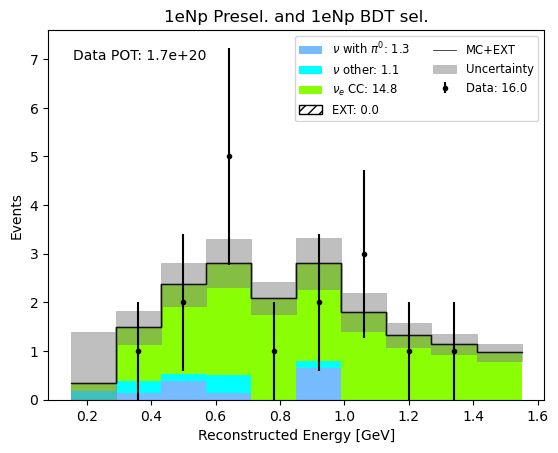

In [7]:
RunHistPlotter(hist_gen_npl).plot(category_column="paper_category", include_multisim_errors=True, add_ext_error_floor=False)

<AxesSubplot:title={'center':'1e0p Presel. and 1e0p BDT sel.'}, xlabel='Reconstructed Energy [GeV]', ylabel='Events'>

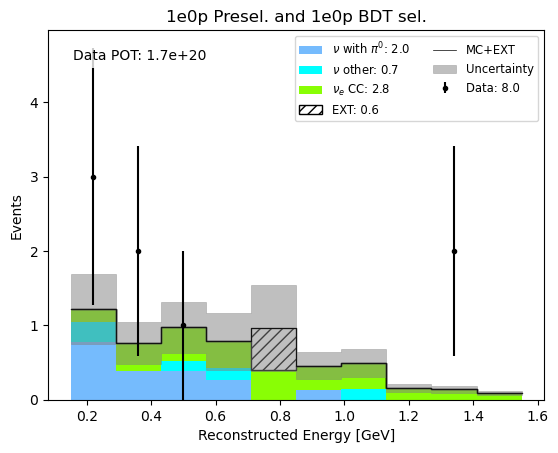

In [10]:
hist_gen_zpl = RunHistGenerator(
    rundata,
    Binning.from_config(*binning_def),
    selection="ZPBDT",
    preselection="ZP",
    data_pot=data_pot,
)
RunHistPlotter(hist_gen_zpl).plot(category_column="paper_category", include_multisim_errors=True, add_ext_error_floor=False)

<AxesSubplot:title={'center':'Correlation matrix'}, xlabel='Global bin number', ylabel='Global bin number'>

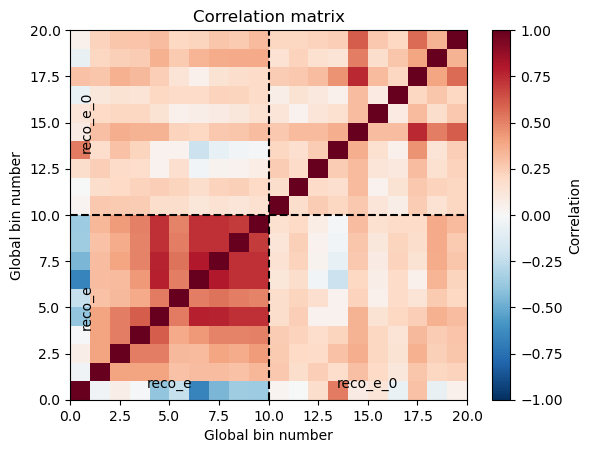

In [15]:
from matplotlib import pyplot as plt
from microfit.histogram import HistogramGenerator

mc_generators = [hist_gen_npl.mc_hist_generator, hist_gen_zpl.mc_hist_generator]
joint_hist = HistogramGenerator.generate_joint_histogram(mc_generators, include_multisim_errors=True)
fig, ax = plt.subplots()
joint_hist.draw_covariance_matrix(ax=ax)

In [8]:
signal_generator = RunHistGenerator(
    rundata,
    binning,
    data_pot=data_pot,
    sideband_generator=None,
    uncertainty_defaults=None,
)

<AxesSubplot:title={'center':'No Presel. and No Sel.'}, xlabel='Reconstructed Energy [GeV]', ylabel='Events'>

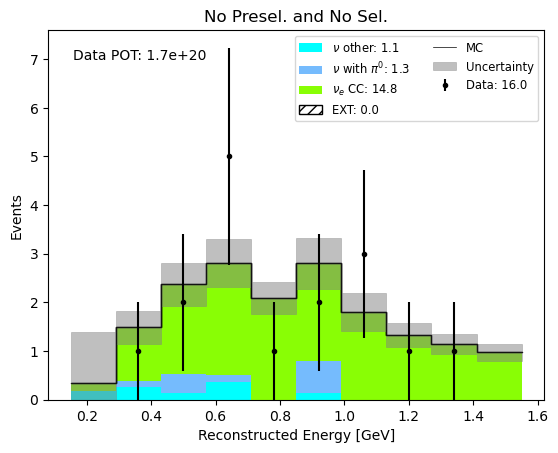

In [12]:
RunHistPlotter(signal_generator).plot(category_column="paper_category", include_multisim_errors=True, add_ext_error_floor=False, channel="NPBDT")

<AxesSubplot:title={'center':'No Presel. and No Sel.'}, xlabel='Reconstructed Energy [GeV]', ylabel='Events'>

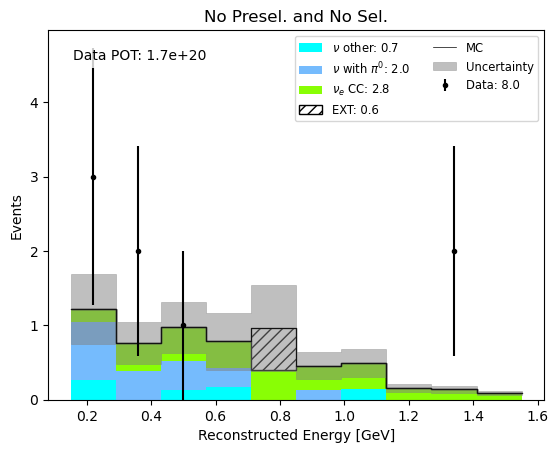

In [11]:
RunHistPlotter(signal_generator).plot(category_column="paper_category", include_multisim_errors=True, add_ext_error_floor=False, channel="ZPBDT")

<AxesSubplot:title={'center':'Correlation matrix'}, xlabel='Global bin number', ylabel='Global bin number'>

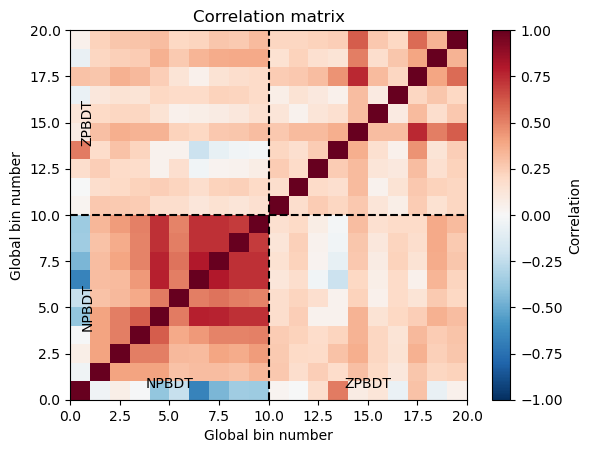

In [16]:
from matplotlib import pyplot as plt


mc_hist = signal_generator.get_mc_hist(include_multisim_errors=True)
fig, ax = plt.subplots()
mc_hist.draw_covariance_matrix(ax=ax)